In [187]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
# Treatment
dfg_PA_treatment = pd.read_csv("testdata1/2.PA_treatment.csv")
dfg_QOL_treatment =pd.read_csv("testdata1/2.QOL_treatment.csv")
dfg_Pain_treatment=pd.read_csv("testdata1/2.Pain_treatment.csv")

# Control group
df_PA_control_before = pd.read_csv("testdata1/2.PA_control.csv")
df_QOL_control_before = pd.read_csv("testdata1/2.QOL_control.csv")
df_Pain_control_before= pd.read_csv("testdata1/2.Pain_control.csv")

# Balanced group
df_PA_balanced = pd.read_csv("testdata1/3.PA_balanced.csv")
df_QOL_balanced= pd.read_csv("testdata1/3.QOL_balanced.csv")
df_Pain_balanced=pd.read_csv("testdata1/3.Pain_balanced.csv")


In [189]:
print("Shapes of the dataframes:")
print("df_PA_balanced shape:", df_PA_balanced.shape)
print("df_QOL_balanced shape:", df_QOL_balanced.shape)
print("df_Pain_balanced shape:", df_Pain_balanced.shape)
print("dfg_PA_treatment shape:", dfg_PA_treatment.shape)
print("dfg_QOL_treatment shape:", dfg_QOL_treatment.shape)
print("dfg_Pain_treatment shape:", dfg_Pain_treatment.shape)
print("df_PA_control_before shape:", df_PA_control_before.shape)
print("df_QOL_control_before shape:", df_QOL_control_before.shape)
print("df_Pain_control_before shape:", df_Pain_control_before.shape)

Shapes of the dataframes:
df_PA_balanced shape: (1156, 10)
df_QOL_balanced shape: (1156, 10)
df_Pain_balanced shape: (1156, 10)
dfg_PA_treatment shape: (7603, 9)
dfg_QOL_treatment shape: (7603, 9)
dfg_Pain_treatment shape: (7603, 9)
df_PA_control_before shape: (1156, 9)
df_QOL_control_before shape: (1156, 9)
df_Pain_control_before shape: (1156, 9)


In [190]:
df_Pain_balanced

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Pain,Baseline_Quality_of_life,pain_change,Treatment
0,68.0,1.0,31.6,1.0,1.0,1,30.0,56.25,-30.0,0
1,59.0,2.0,26.8,1.0,1.0,2,70.0,37.50,-40.0,0
2,59.0,2.0,26.8,1.0,1.0,2,70.0,37.50,-40.0,0
3,59.0,2.0,26.8,1.0,1.0,2,70.0,37.50,-40.0,0
4,46.0,1.0,30.0,1.0,1.0,1,20.0,68.75,30.0,0
...,...,...,...,...,...,...,...,...,...,...
1151,61.0,2.0,33.2,1.0,1.0,3,30.0,37.50,10.0,0
1152,61.0,2.0,33.2,1.0,1.0,3,30.0,37.50,10.0,0
1153,61.0,2.0,33.2,1.0,1.0,3,30.0,37.50,10.0,0
1154,59.0,1.0,34.1,1.0,1.0,3,90.0,37.50,0.0,0


In [191]:
dfg_QOL_treatment

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Pain,Baseline_Quality_of_life,QOL_change
0,50,2,22.68,1,1.0,3,65.0,31.25,25.00
1,45,1,29.07,1,1.0,3,96.0,25.00,18.75
2,46,2,26.10,1,1.0,1,39.0,68.75,-6.25
3,53,2,28.03,1,1.0,1,15.0,62.50,25.00
4,68,2,27.82,1,1.0,3,15.0,87.50,6.25
...,...,...,...,...,...,...,...,...,...
7598,55,2,35.63,1,1.0,3,57.0,50.00,6.25
7599,61,2,29.34,1,1.0,1,55.0,25.00,43.75
7600,62,1,25.88,1,1.0,1,26.0,50.00,-25.00
7601,47,2,26.51,1,1.0,1,47.0,43.75,-25.00


#### Outcomes

##### Physical activity in Balanced OAI:

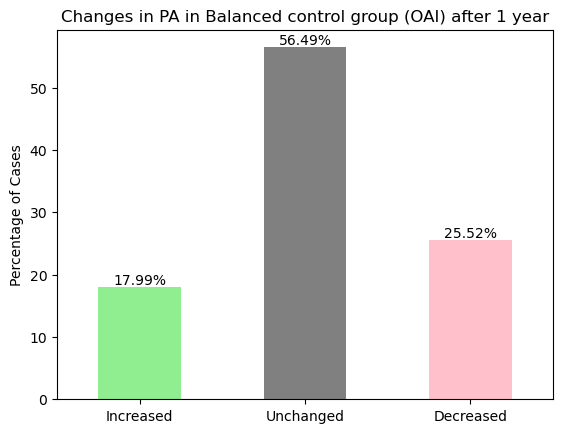

(1156, 11)


In [192]:
# Define the function to categorize PA_changes
def categorize_change(PA_change):
    if PA_change > 0:
        return 'Increased'
    elif PA_change < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

# Apply the function to categorize PA_changes
df_PA_balanced['PA_change_category'] = df_PA_balanced['PA_change'].apply(categorize_change)

# Calculate counts for each category of PA_change
change_counts = df_PA_balanced['PA_change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])

# Calculate percentages
change_percentages = 100 * change_counts / change_counts.sum()

# Plot
ax = change_percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in PA in Balanced control group (OAI) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(ticks=[0, 1, 2], labels=["Increased", "Unchanged", "Decreased"], rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
print(df_PA_balanced.shape)


##### Physical activity in GLA:D

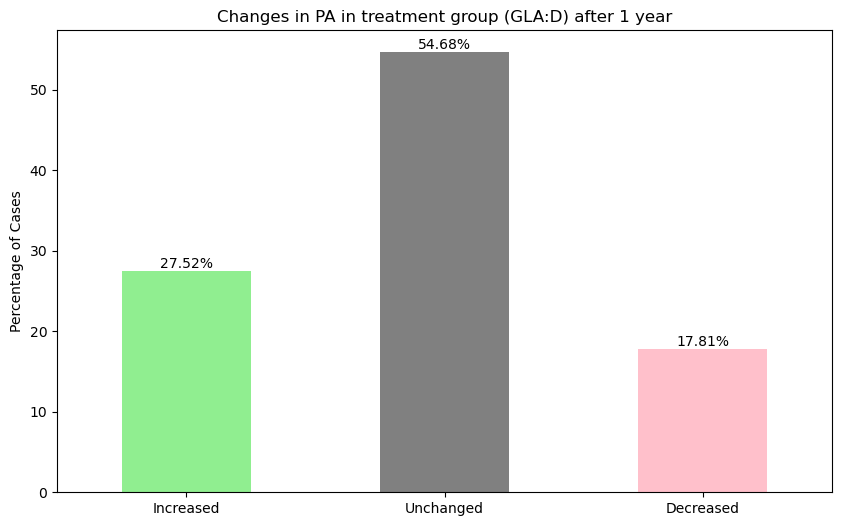

In [193]:
# Categorize the PA_changes
dfg_PA_treatment['PA_change_category'] = pd.cut(dfg_PA_treatment['PA_change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
                                                labels=['Decreased', 'Unchanged', 'Increased'])

# Ensure the order: Increased, Unchanged, Decreased
order = ['Increased', 'Unchanged', 'Decreased']

# Count the number of cases in each category, reindex to ensure order
PA_change_counts = dfg_PA_treatment['PA_change_category'].value_counts().reindex(order)

# Calculate percentages
total = PA_change_counts.sum()
percentages = (PA_change_counts / total * 100).round(2)

# Specify colors for each category
colors = ['lightgreen', 'grey', 'pink']

# Visualize the results with a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
percentages.plot(kind='bar', color=colors, ax=ax)
plt.title('Changes in PA in treatment group (GLA:D) after 1 year')
ax.set_xlabel('')  # Set X-axis label to blank
ax.set_ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased', 'Unchanged', 'Decreased'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


In [194]:
dfg_PA_treatment.shape

(7603, 10)

##### In one Plot

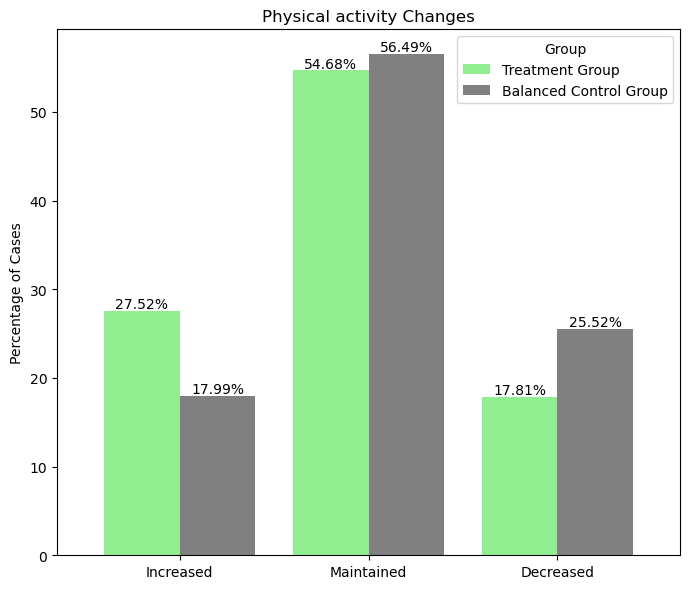

In [195]:
# Define the function to categorize PA_changes
def categorize_change(PA_change):
    if PA_change > 0:
        return 'Increased'
    elif PA_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize PA_changes for balanced control group
df_PA_balanced['PA_change_category'] = df_PA_balanced['PA_change'].apply(categorize_change)

# Calculate counts for each category of PA_change
change_counts_balanced = df_PA_balanced['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages for balanced control group
change_percentages_balanced = 100 * change_counts_balanced / change_counts_balanced.sum()

# Categorize the PA_changes for treatment group
dfg_PA_treatment['PA_change_category'] = pd.cut(dfg_PA_treatment['PA_change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
                                                labels=['Decreased', 'Maintained', 'Increased'])

# Ensure the order: Increased, Unchanged, Decreased
order = ['Increased', 'Maintained', 'Decreased']

# Count the number of cases in each category, reindex to ensure order for treatment group
PA_change_counts_treatment = dfg_PA_treatment['PA_change_category'].value_counts().reindex(order)

# Calculate percentages for treatment group
change_percentages_treatment = 100 * PA_change_counts_treatment / PA_change_counts_treatment.sum()

# Combine the data into a single DataFrame for plotting
combined_data = pd.DataFrame({
    'Treatment Group': change_percentages_treatment,
    'Balanced Control Group': change_percentages_balanced
})

# Plot the combined data as grouped bar chart
fig, ax = plt.subplots(figsize=(7, 6))

combined_data.plot(kind='bar', color=['lightgreen', 'grey'], ax=ax, width=0.8)

plt.title('Physical activity Changes')
plt.xlabel('')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


# -----------------------------------

##### Quality of life in OAI

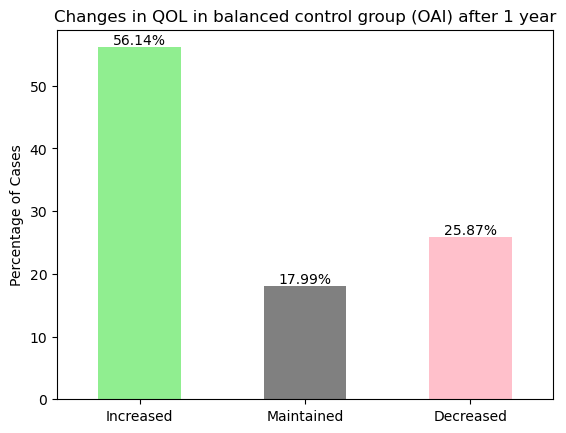

In [196]:
# Define the function to categorize QOL_changes
def QOL_categorize_change(QOL_change):
    if QOL_change > 0:
        return 'Increased'
    elif QOL_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize QOL_changes
df_QOL_balanced['QOL_change_category'] = df_QOL_balanced['QOL_change'].apply(QOL_categorize_change)

# Calculate counts for each category of QOL_change
change_counts = df_QOL_balanced['QOL_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in QOL in balanced control group (OAI) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased', 'Maintained', 'Decreased'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### Quality of life in OAI: changes of at least 10 points

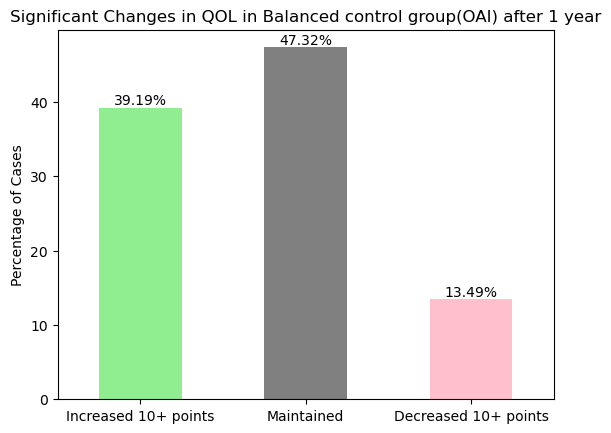

In [197]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes
df_QOL_balanced['QOL_significant_change_category'] = df_QOL_balanced['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change
change_counts = df_QOL_balanced['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Significant Changes in QOL in Balanced control group(OAI) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### Quality of life in GLAD

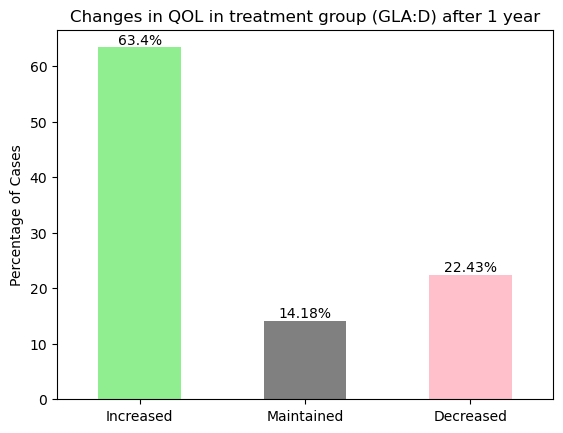

In [198]:
# Define the function to categorize changes
def QOL_categorize_change(QOL_change):
    if QOL_change > 0:
        return 'Increased'
    elif QOL_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize QOL_changes
dfg_QOL_treatment['QOL_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_change)

# Calculate counts for each category of QOL_change
QOL_change_counts = dfg_QOL_treatment['QOL_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages
total = QOL_change_counts.sum()
percentages = (QOL_change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in QOL in treatment group (GLA:D) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased', 'Maintained', 'Decreased'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### Quality of life in GLAD: changes of at least 10 point

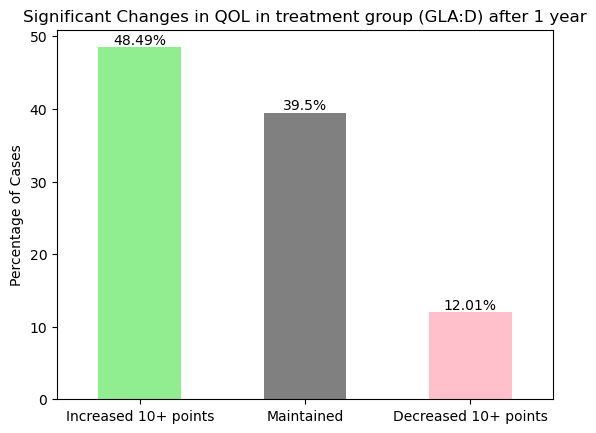

In [199]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes
dfg_QOL_treatment['QOL_significant_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change
QOL_significant_change_counts = dfg_QOL_treatment['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages
total = QOL_significant_change_counts.sum()
percentages = (QOL_significant_change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Significant Changes in QOL in treatment group (GLA:D) after 1 year')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0, ticks=[0, 1, 2], labels=['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### In one plot

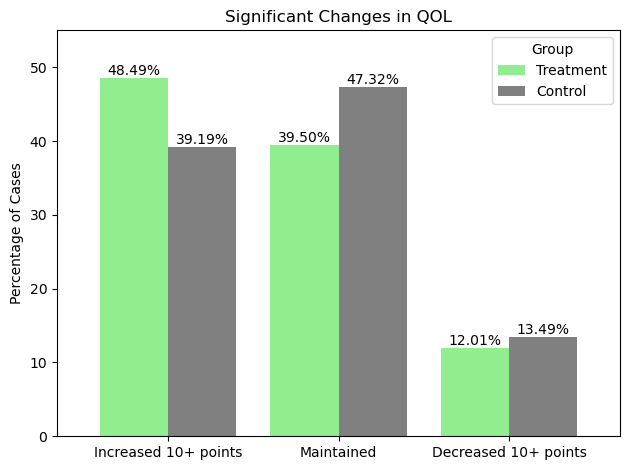

In [200]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes for treatment group
dfg_QOL_treatment['QOL_significant_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for treatment group
QOL_significant_change_counts_treatment = dfg_QOL_treatment['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for treatment group
total_treatment = QOL_significant_change_counts_treatment.sum()
percentages_treatment = (QOL_significant_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize significant QOL_changes for control group
df_QOL_balanced['QOL_significant_change_category'] = df_QOL_balanced['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for control group
QOL_significant_change_counts_control = df_QOL_balanced['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for control group
total_control = QOL_significant_change_counts_control.sum()
percentages_control = (QOL_significant_change_counts_control / total_control * 100).round(2)

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment': percentages_treatment,
    'Control': percentages_control
})

# Plot
ax = comparison_df.plot(kind='bar', color=['lightgreen', 'grey'], width=0.8)

# plt.title('Comparison of Significant Changes in QOL in Treatment Group (GLA:D) and Balanced Control Group (OAI) after 1 Year')
plt.title('Significant Changes in QOL')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Adjust y-limit to create space for annotations
plt.ylim(0, 55)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()

# -----------------------------------

##### Pain in OAI

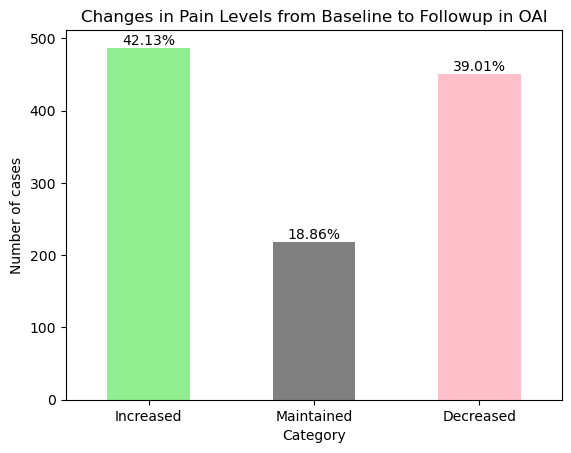

In [201]:
# Define the function to categorize changes
def pain_categorize_change(pain_change):
    if pain_change > 0:
        return 'Increased'
    elif pain_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize pain_changes
df_Pain_balanced['pain_change_category'] = df_Pain_balanced['pain_change'].apply(pain_categorize_change)

# Calculate counts for each category of pain_change
change_counts = df_Pain_balanced['pain_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Plot
ax = change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Pain Levels from Baseline to Followup in OAI')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)

# Calculate the percentages and annotate the bars
total = change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in OAI: changes of at least 20 points

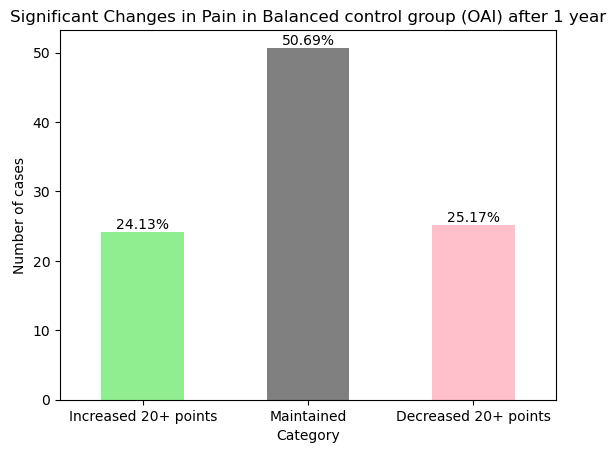

In [202]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'  # This now clearly means the pain changed but less than 20 points either way
    
# Apply the function to categorize significant pain changes
df_Pain_balanced['pain_significant_change_category'] = df_Pain_balanced['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change
pain_significant_change_counts = df_Pain_balanced['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages
total = pain_significant_change_counts.sum()
percentages = (pain_significant_change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Significant Changes in Pain in Balanced control group (OAI) after 1 year')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### Pain in GLAD

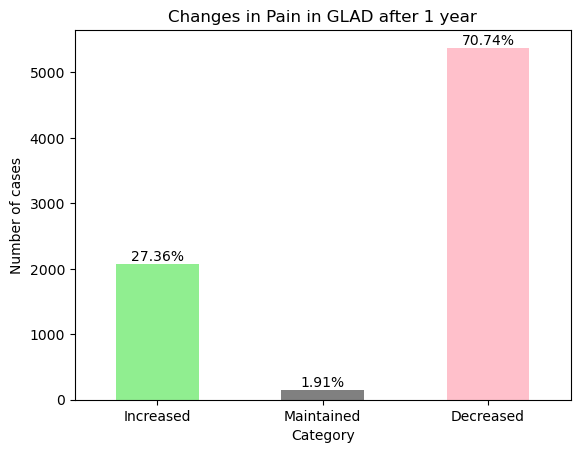

In [203]:
# Define the function to categorize changes
def pain_categorize_change(pain_change):
    if pain_change > 0:
        return 'Increased'
    elif pain_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize pain_changes
dfg_Pain_treatment['pain_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_change)

# Calculate counts for each category of pain_change
pain_change_counts = dfg_Pain_treatment['pain_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Plot
ax = pain_change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Pain in GLAD after 1 year')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)

# Calculate the percentages and annotate the bars
total = pain_change_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


##### Pain in GLAD: changes of at least 20 points

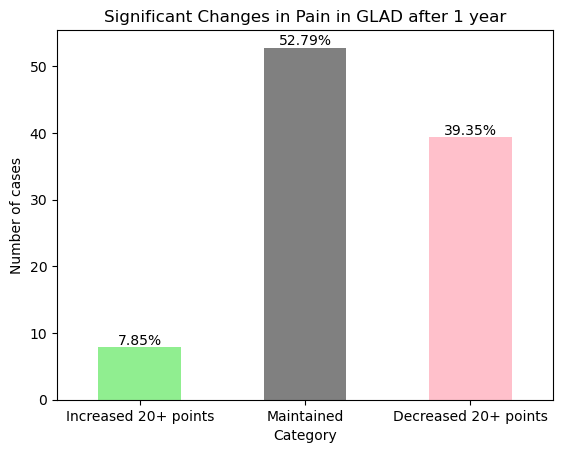

In [204]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'  # This now clearly means the pain changed but less than 20 points either way

# Apply the function to categorize significant pain changes
dfg_Pain_treatment['pain_significant_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change
pain_significant_change_counts = dfg_Pain_treatment['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages
total = pain_significant_change_counts.sum()
percentages = (pain_significant_change_counts / total * 100).round(2)

# Plot
ax = percentages.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Significant Changes in Pain in GLAD after 1 year')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=0)

# Annotate each bar with the percentage of cases
for i, value in enumerate(percentages.values):
    ax.text(i, value, f'{value}%', ha='center', va='bottom')

plt.show()


##### In one Plot

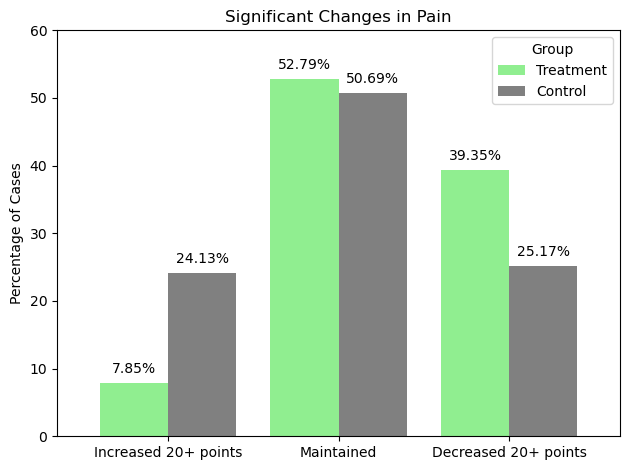

In [205]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'  # This now clearly means the pain changed but less than 20 points either way

# Apply the function to categorize significant pain changes for treatment group
dfg_Pain_treatment['pain_significant_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for treatment group
pain_significant_change_counts_treatment = dfg_Pain_treatment['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for treatment group
total_treatment = pain_significant_change_counts_treatment.sum()
percentages_treatment = (pain_significant_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize significant pain changes for control group
df_Pain_balanced['pain_significant_change_category'] = df_Pain_balanced['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for control group
pain_significant_change_counts_control = df_Pain_balanced['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for control group
total_control = pain_significant_change_counts_control.sum()
percentages_control = (pain_significant_change_counts_control / total_control * 100).round(2)

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment': percentages_treatment,
    'Control': percentages_control
}, index=['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Plot
ax = comparison_df.plot(kind='bar', color=['lightgreen', 'grey'], width=0.8)

# plt.title('Comparison of Significant Changes in Pain in Treatment Group (GLA:D) and Balanced Control Group (OAI) after 1 Year')
plt.title('Significant Changes in Pain')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Adjust y-limit to create space for annotations
plt.ylim(0, 60)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


#### 3 group in PA

In [206]:
df_PA_control_before.PA_change.value_counts()

PA_change
 0    708
-1    188
 1    147
-2     57
 2     56
Name: count, dtype: int64

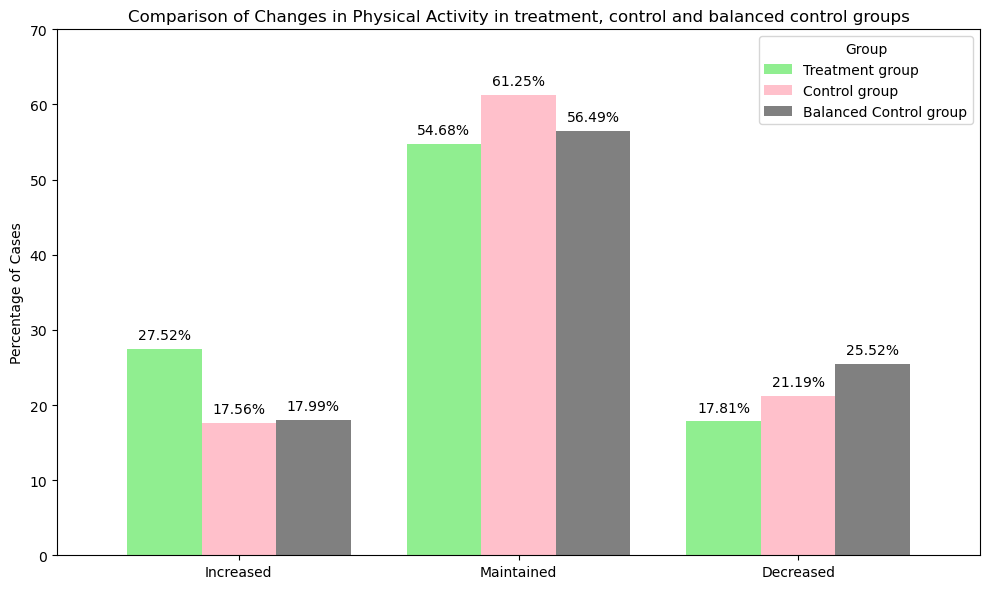

In [207]:
# Define the function to categorize PA_changes
def categorize_PA_change(PA_change):
    if PA_change > 0:
        return 'Increased'
    elif PA_change < 0:
        return 'Decreased'
    else:
        return 'Maintained'

# Apply the function to categorize PA_changes for treatment group
dfg_PA_treatment['PA_change_category'] = dfg_PA_treatment['PA_change'].apply(categorize_PA_change)

# Count the number of cases in each category for treatment group
PA_change_counts_treatment = dfg_PA_treatment['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages for treatment group
total_treatment = PA_change_counts_treatment.sum()
percentages_treatment = (PA_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize PA_changes for control group
df_PA_control_before['PA_change_category'] = df_PA_control_before['PA_change'].apply(categorize_PA_change)

# Count the number of cases in each category for control group
PA_change_counts_control = df_PA_control_before['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages for control group
total_control = PA_change_counts_control.sum()
percentages_control = (PA_change_counts_control / total_control * 100).round(2)

# Apply the function to categorize PA_changes for balanced control group
df_PA_balanced['PA_change_category'] = df_PA_balanced['PA_change'].apply(categorize_PA_change)

# Count the number of cases in each category for balanced control group
PA_change_counts_balanced = df_PA_balanced['PA_change_category'].value_counts().reindex(['Increased', 'Maintained', 'Decreased'])

# Calculate percentages for balanced control group
total_balanced = PA_change_counts_balanced.sum()
percentages_balanced = (PA_change_counts_balanced / total_balanced * 100).round(2)

# Combine the data into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment group': percentages_treatment,
    'Control group': percentages_control,
    'Balanced Control group': percentages_balanced
}, index=['Increased', 'Maintained', 'Decreased'])

# Plot the combined data as grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

comparison_df.plot(kind='bar', color=['lightgreen', 'pink', 'grey'], ax=ax, width=0.8)

plt.title('Comparison of Changes in Physical Activity in treatment, control and balanced control groups')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Adjust y-limit to create space for annotations
plt.ylim(0, 70)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


#### 3 group in QOL


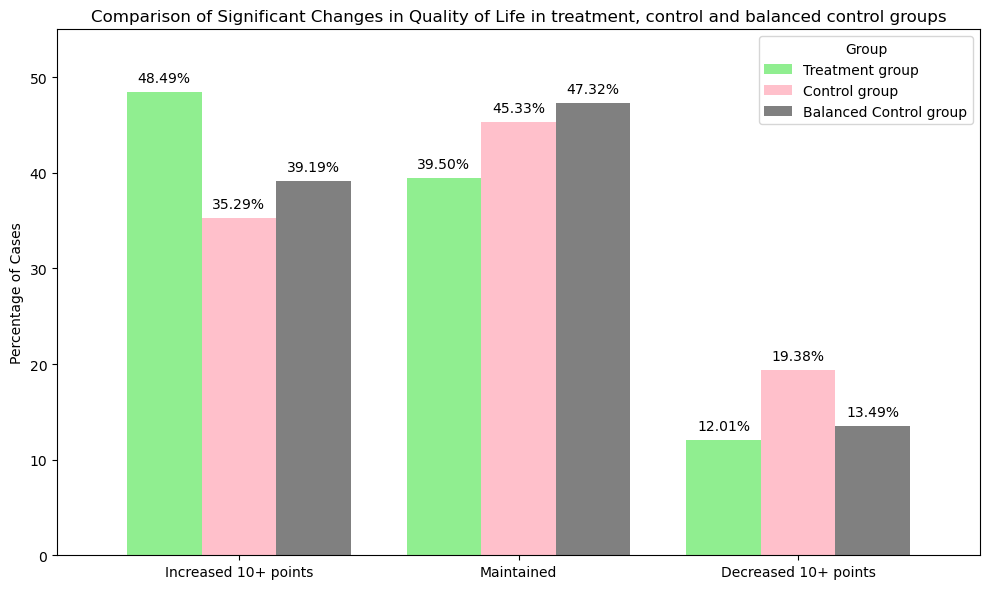

In [208]:
# Define the function to categorize changes of at least 10 points
def QOL_categorize_significant_change(QOL_change):
    if QOL_change >= 10:
        return 'Increased 10+ points'
    elif QOL_change <= -10:
        return 'Decreased 10+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant QOL_changes for treatment group
dfg_QOL_treatment['QOL_significant_change_category'] = dfg_QOL_treatment['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for treatment group
QOL_significant_change_counts_treatment = dfg_QOL_treatment['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for treatment group
total_treatment = QOL_significant_change_counts_treatment.sum()
percentages_treatment = (QOL_significant_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize significant QOL_changes for control group
df_QOL_control_before['QOL_significant_change_category'] = df_QOL_control_before['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for control group
QOL_significant_change_counts_control = df_QOL_control_before['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for control group
total_control = QOL_significant_change_counts_control.sum()
percentages_control = (QOL_significant_change_counts_control / total_control * 100).round(2)

# Apply the function to categorize significant QOL_changes for balanced control group
df_QOL_balanced['QOL_significant_change_category'] = df_QOL_balanced['QOL_change'].apply(QOL_categorize_significant_change)

# Calculate counts for each category of significant QOL_change for balanced control group
QOL_significant_change_counts_balanced = df_QOL_balanced['QOL_significant_change_category'].value_counts().reindex(['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Calculate percentages for balanced control group
total_balanced = QOL_significant_change_counts_balanced.sum()
percentages_balanced = (QOL_significant_change_counts_balanced / total_balanced * 100).round(2)

# Combine the data into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment group': percentages_treatment,
    'Control group': percentages_control,
    'Balanced Control group': percentages_balanced
}, index=['Increased 10+ points', 'Maintained', 'Decreased 10+ points'])

# Plot the combined data as grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

comparison_df.plot(kind='bar', color=['lightgreen', 'pink', 'grey'], ax=ax, width=0.8)

plt.title('Comparison of Significant Changes in Quality of Life in treatment, control and balanced control groups')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Adjust y-limit to create space for annotations
plt.ylim(0, 55)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


#### 3 group in Pain


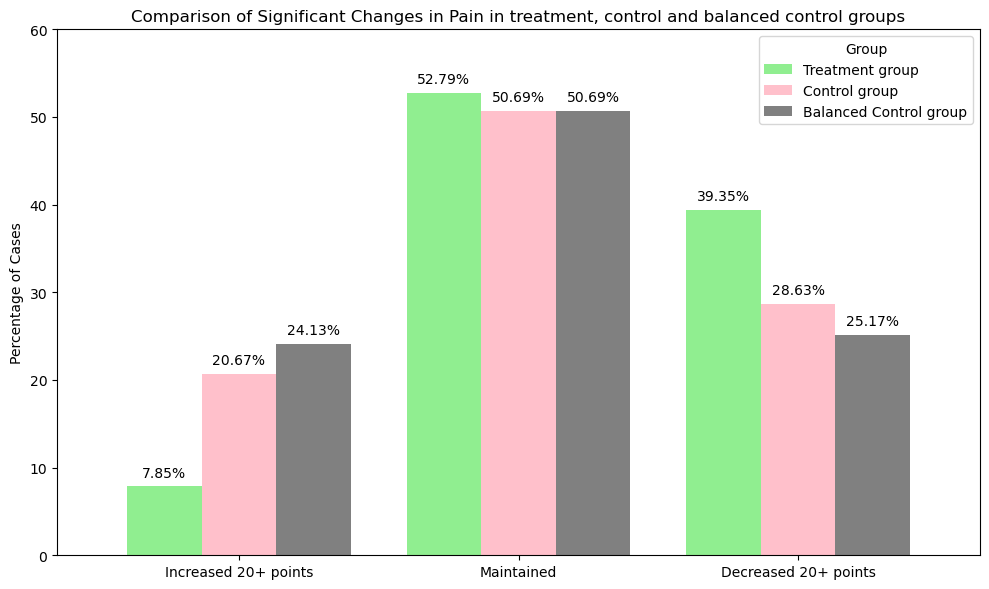

In [209]:
# Define the function to categorize changes of at least 20 points
def pain_categorize_significant_change(pain_change):
    if pain_change <= -20:
        return 'Decreased 20+ points'
    elif pain_change >= 20:
        return 'Increased 20+ points'
    else:
        return 'Maintained'

# Apply the function to categorize significant pain changes for treatment group
dfg_Pain_treatment['pain_significant_change_category'] = dfg_Pain_treatment['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for treatment group
pain_significant_change_counts_treatment = dfg_Pain_treatment['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for treatment group
total_treatment = pain_significant_change_counts_treatment.sum()
percentages_treatment = (pain_significant_change_counts_treatment / total_treatment * 100).round(2)

# Apply the function to categorize significant pain changes for control group
df_Pain_control_before['pain_significant_change_category'] = df_Pain_control_before['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for control group
pain_significant_change_counts_control = df_Pain_control_before['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for control group
total_control = pain_significant_change_counts_control.sum()
percentages_control = (pain_significant_change_counts_control / total_control * 100).round(2)

# Apply the function to categorize significant pain changes for balanced control group
df_Pain_balanced['pain_significant_change_category'] = df_Pain_balanced['pain_change'].apply(pain_categorize_significant_change)

# Calculate counts for each category of significant pain change for balanced control group
pain_significant_change_counts_balanced = df_Pain_balanced['pain_significant_change_category'].value_counts().reindex(['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Calculate percentages for balanced control group
total_balanced = pain_significant_change_counts_balanced.sum()
percentages_balanced = (pain_significant_change_counts_balanced / total_balanced * 100).round(2)

# Combine the data into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Treatment group': percentages_treatment,
    'Control group': percentages_control,
    'Balanced Control group': percentages_balanced
}, index=['Increased 20+ points', 'Maintained', 'Decreased 20+ points'])

# Plot the combined data as grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

comparison_df.plot(kind='bar', color=['lightgreen', 'pink', 'grey'], ax=ax, width=0.8)

plt.title('Comparison of Significant Changes in Pain in treatment, control and balanced control groups')
plt.xlabel('')  # Set X-axis label to blank
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=0)

# Adjust y-limit to create space for annotations
plt.ylim(0, 60)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='Group')
plt.tight_layout()
plt.show()


In [210]:
categorical_vars = ['Gender', 'Depression', 'Employment_status', 'Baseline_Physical_Activity']
continuous_vars = ['Age', 'BMI', 'Baseline_Quality_of_life', 'Baseline_Pain', 'Baseline_Physical_Activity']

# Function to compute min, max, and mean for continuous variables
def compute_continuous_statistics(df, columns):
    stats = {}
    for col in columns:
        stats[col] = {
            'min': df[col].min(),
            'max': df[col].max(),
            'mean': df[col].mean()
        }
    return pd.DataFrame(stats).T

# Function to count cases for categorical variables
def compute_categorical_counts(df, columns):
    counts = {}
    for col in columns:
        counts[col] = df[col].value_counts()
    return counts



In [211]:
# Compute statistics for continuous variables in treatment Group
continuous_stats = compute_continuous_statistics(df_PA_balanced, continuous_vars)
print("Statistics for continuous variables:")
print(continuous_stats)
print("\n")

Statistics for continuous variables:
                             min    max       mean
Age                         45.0   79.0  56.562284
BMI                         18.2   46.7  29.577422
Baseline_Quality_of_life     0.0  100.0  45.334126
Baseline_Pain                0.0  100.0  46.721453
Baseline_Physical_Activity   1.0    3.0   2.064879




In [212]:
# Compute counts for categorical variables in treatment Group
categorical_counts = compute_categorical_counts(df_PA_balanced, categorical_vars)
print("Counts for categorical variables:")
for var, count in categorical_counts.items():
    print(f"{var}:")
    print(count)
    print("\n")

Counts for categorical variables:
Gender:
Gender
2.0    744
1.0    412
Name: count, dtype: int64


Depression:
Depression
1.0    1023
2.0     130
3.0       3
Name: count, dtype: int64


Employment_status:
Employment_status
1.0    1051
3.0      60
2.0      45
Name: count, dtype: int64


Baseline_Physical_Activity:
Baseline_Physical_Activity
3    480
1    405
2    271
Name: count, dtype: int64




In [213]:
df_PA_balanced.PA_change_category.value_counts()

PA_change_category
Maintained    653
Decreased     295
Increased     208
Name: count, dtype: int64

In [214]:
df_QOL_balanced.QOL_significant_change_category.value_counts()

QOL_significant_change_category
Maintained              547
Increased 10+ points    453
Decreased 10+ points    156
Name: count, dtype: int64

In [215]:
df_Pain_balanced.pain_significant_change_category.value_counts()

pain_significant_change_category
Maintained              586
Decreased 20+ points    291
Increased 20+ points    279
Name: count, dtype: int64

In [216]:
df_PA_balanced


,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Pain,Baseline_Quality_of_life,PA_change,Treatment,PA_change_category
0,68.0,1.0,31.6,1.0,1.0,1,30.0,56.25,0,0,Maintained
1,59.0,2.0,26.8,1.0,1.0,2,70.0,37.50,-1,0,Decreased
2,59.0,2.0,26.8,1.0,1.0,2,70.0,37.50,-1,0,Decreased
3,59.0,2.0,26.8,1.0,1.0,2,70.0,37.50,-1,0,Decreased
4,46.0,1.0,30.0,1.0,1.0,1,20.0,68.75,0,0,Maintained
...,...,...,...,...,...,...,...,...,...,...,...
1151,61.0,2.0,33.2,1.0,1.0,3,30.0,37.50,0,0,Maintained
1152,61.0,2.0,33.2,1.0,1.0,3,30.0,37.50,0,0,Maintained
1153,61.0,2.0,33.2,1.0,1.0,3,30.0,37.50,0,0,Maintained
1154,59.0,1.0,34.1,1.0,1.0,3,90.0,37.50,0,0,Maintained


In [217]:
dfg_PA_treatment

,Age,Gender,BMI,Depression,Employment_status,Baseline_Physical_Activity,Baseline_Pain,Baseline_Quality_of_life,PA_change,PA_change_category
0,50,2,22.68,1,1.0,3,65.0,31.25,0,Maintained
1,45,1,29.07,1,1.0,3,96.0,25.00,0,Maintained
2,46,2,26.10,1,1.0,1,39.0,68.75,2,Increased
3,53,2,28.03,1,1.0,1,15.0,62.50,0,Maintained
4,68,2,27.82,1,1.0,3,15.0,87.50,0,Maintained
...,...,...,...,...,...,...,...,...,...,...
7598,55,2,35.63,1,1.0,3,57.0,50.00,0,Maintained
7599,61,2,29.34,1,1.0,1,55.0,25.00,1,Increased
7600,62,1,25.88,1,1.0,1,26.0,50.00,0,Maintained
7601,47,2,26.51,1,1.0,1,47.0,43.75,0,Maintained
